In [1]:
import torch
import numpy as np
from ANN_model import Features12_NN, Features12_NN2
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

In [8]:
BATCH_SIZE = 30
RANDOM_STATE = 42

X = np.load('Grouped_by_city/taipei_features12_train.npy')
y = np.load('Grouped_by_city/taipei_target_train.npy')

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Total num of data: 2382


In [9]:
model = Features12_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=500, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/500] train_loss: 0.075359, test_loss: 0.016838 | train_mape: 32.5673, test_mape: 18.3307
[Epoch 2/500] train_loss: 0.013641, test_loss: 0.011214 | train_mape: 17.4660, test_mape: 15.4594
[Epoch 3/500] train_loss: 0.011127, test_loss: 0.011060 | train_mape: 15.5372, test_mape: 13.6814
[Epoch 4/500] train_loss: 0.010577, test_loss: 0.009944 | train_mape: 15.2230, test_mape: 13.9983
[Epoch 5/500] train_loss: 0.009451, test_loss: 0.011303 | train_mape: 14.3197, test_mape: 14.6149
[Epoch 6/500] train_loss: 0.008671, test_loss: 0.008732 | train_mape: 13.6528, test_mape: 12.8154
[Epoch 7/500] train_loss: 0.008592, test_loss: 0.009990 | train_mape: 13.4599, test_mape: 14.0052
[Epoch 8/500] train_loss: 0.008217, test_loss: 0.011016 | train_mape: 13.1897, test_mape: 13.1971
[Epoch 9/500] train_loss: 0.007979, test_loss: 0.008951 | train_mape: 13.1214, test_mape: 12.9703
[Epoch 10/500] train_loss: 0.007820, test_loss: 0.009747 | train_mape: 12.9055, test_mape: 12.8679
[Epoch 11/500] trai

In [10]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/taipei_features12_model1.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

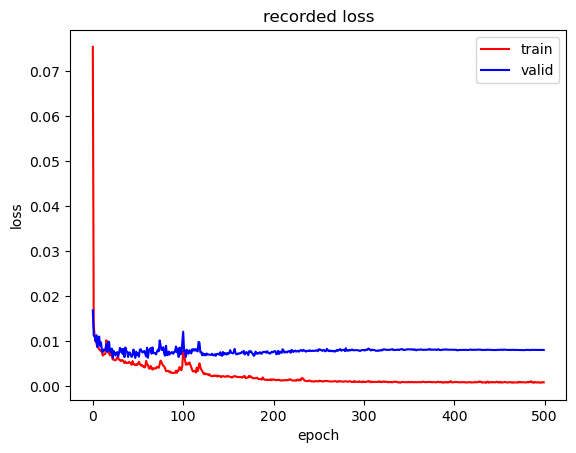

In [11]:
loss_plot(trainloss, testloss)

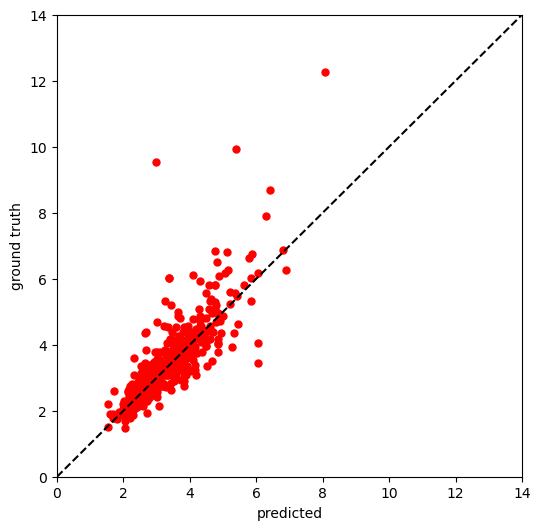

In [12]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

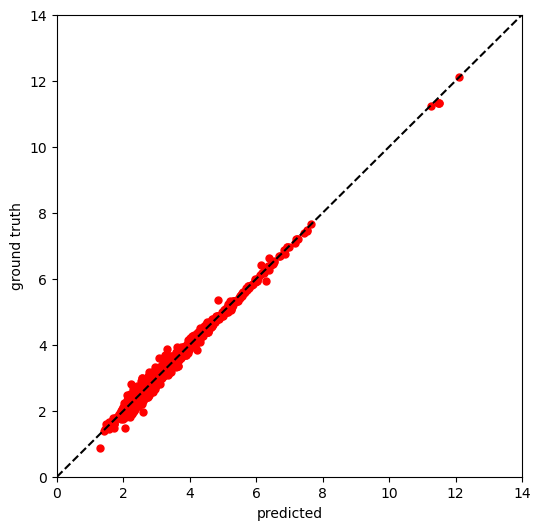

In [13]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)